In [1]:
import time
import json
import requests
import numpy as np
import pandas as pd

import requests
from requests.auth import HTTPBasicAuth

from github.api import Config

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conf = Config()

In [3]:
user_df = pd.read_csv(conf.getUserPath())
repos_df = pd.read_csv(conf.getRepoPath())
commits_df = pd.read_csv(conf.getCommitPath())

## Analisys

In [4]:
repos = repos_df
commits = commits_df

In [5]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))

Total repos till date: 26
Total commits till date: 463


In [6]:
repos.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,2.600000e+01,26.0,26.000000,26.0,26.0
mean,9.227134e+07,0.0,0.192308,0.0,0.0
std,5.504859e+07,0.0,0.633671,0.0,0.0
min,8.301404e+06,0.0,0.000000,0.0,0.0
25%,4.401059e+07,0.0,0.000000,0.0,0.0
50%,9.143438e+07,0.0,0.000000,0.0,0.0
75%,1.270638e+08,0.0,0.000000,0.0,0.0
max,2.091179e+08,0.0,3.000000,0.0,0.0


In [7]:
print("Two most common commit messages: {}".format(' and '.join(commits['Message'].value_counts().index[:2])))

Two most common commit messages: Initial commit and Merge branch 'master' of github.com:mateusmoura/quadrado


In [8]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())


In [9]:
commits_count.columns = ['Id', 'Commits count']

In [10]:
repos = pd.merge(repos, commits_count, on = 'Id')

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits per repository')

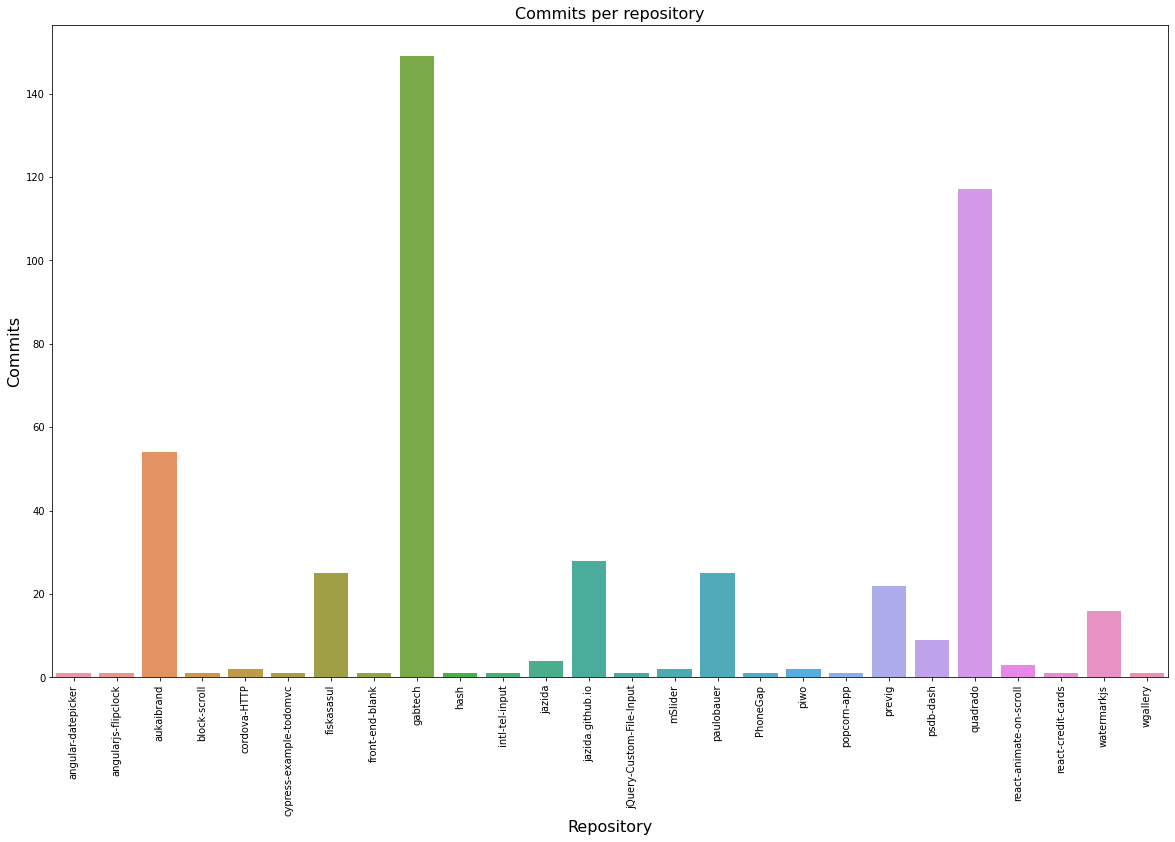

In [11]:
plt.figure(figsize = (20, 12))
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

In [12]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each year')

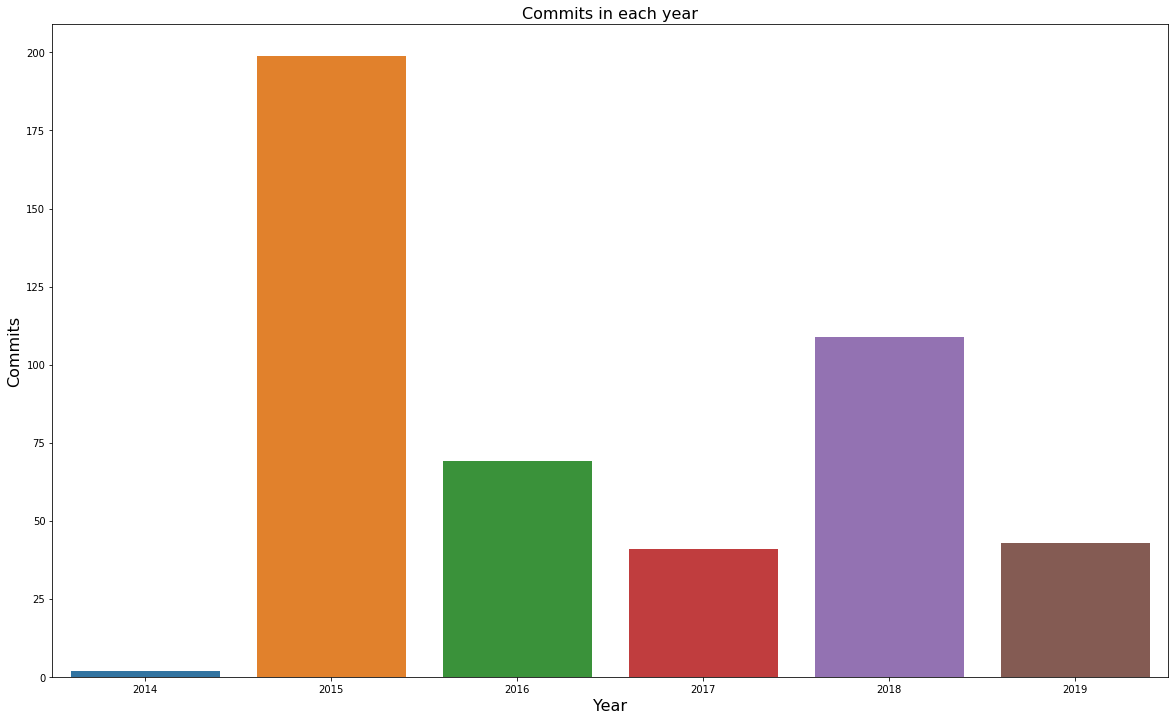

In [13]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

In [16]:
commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == '2018'].groupby('Month').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each month of 2020')

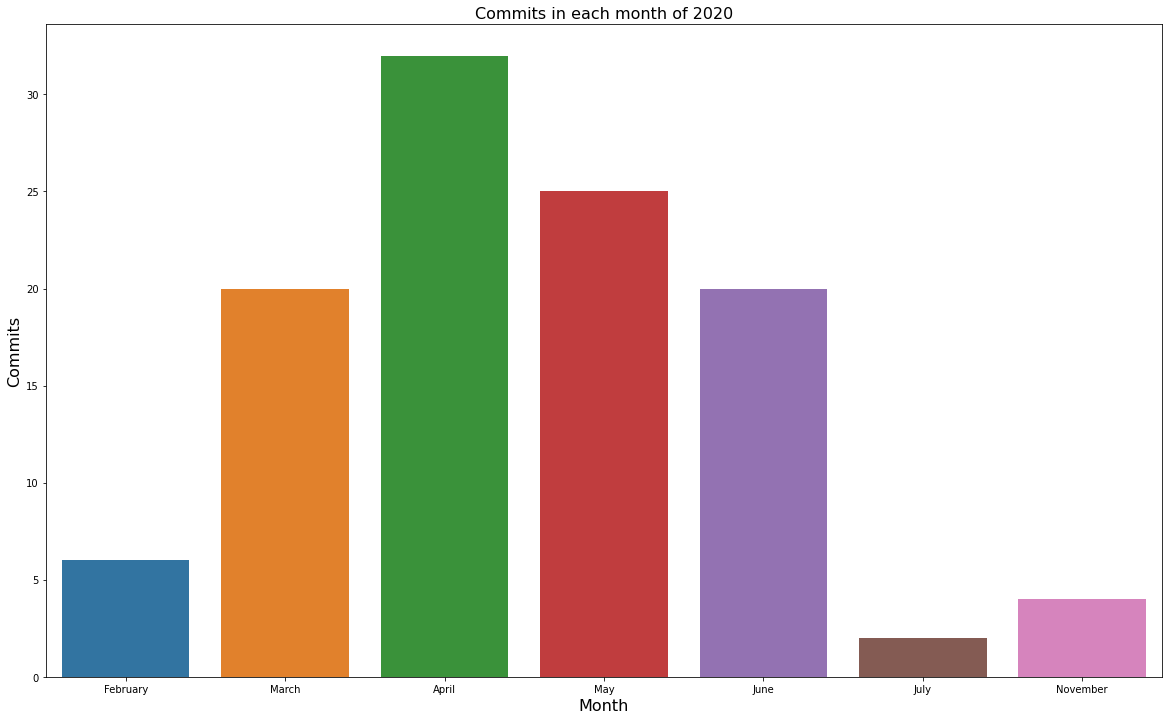

In [17]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'Autgust', '09': 'September','10': 'October', '11':'November', '12': 'Dezember'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(monthly_stats.index, monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of 2020", fontsize = 16)

In [20]:
commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == '2019')
                       & (commits['Month'] == '05')]['Date only'].value_counts().sort_index()

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in March, 2019')

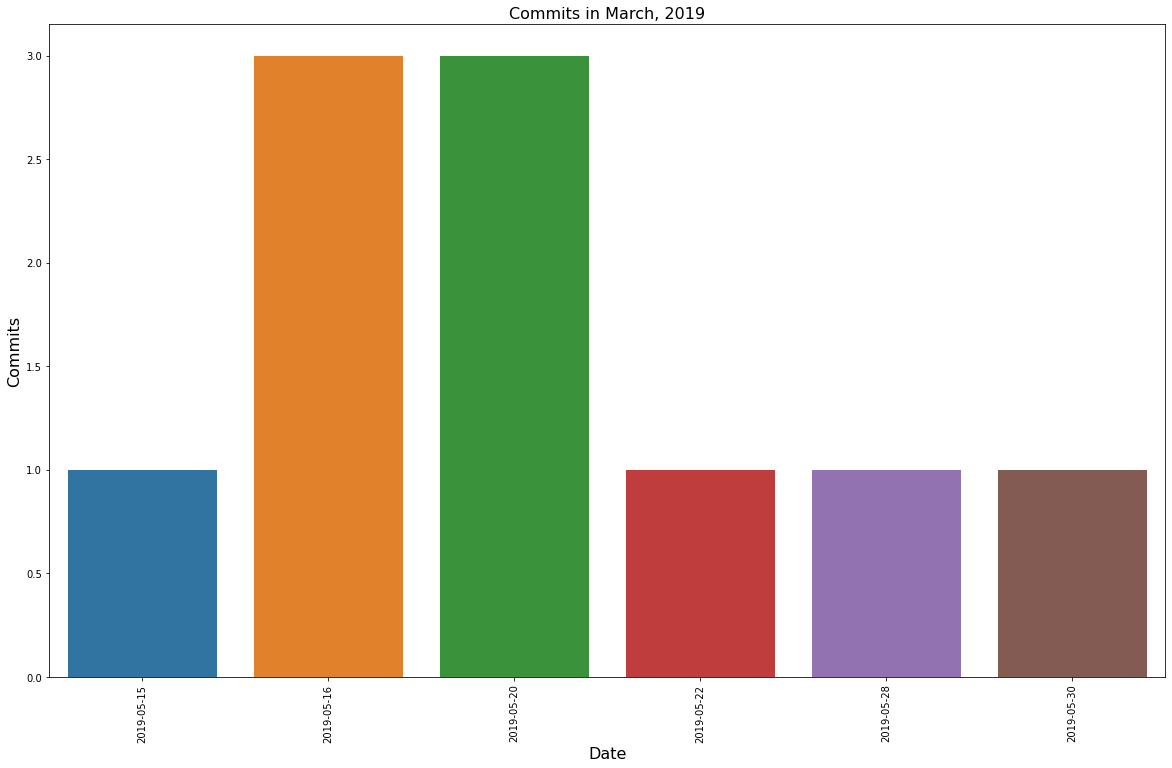

In [21]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(commit_stats.index, commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in March, 2019", fontsize = 16)

## Language

In [24]:
repos["Languages URL"]

0     https://api.github.com/repos/mateusmoura/angul...
1     https://api.github.com/repos/mateusmoura/angul...
2     https://api.github.com/repos/mateusmoura/aukai...
3     https://api.github.com/repos/mateusmoura/block...
4     https://api.github.com/repos/mateusmoura/cordo...
5     https://api.github.com/repos/mateusmoura/cypre...
6     https://api.github.com/repos/mateusmoura/fiska...
7     https://api.github.com/repos/mateusmoura/front...
8     https://api.github.com/repos/mateusmoura/gabte...
9     https://api.github.com/repos/mateusmoura/hash/...
10    https://api.github.com/repos/mateusmoura/intl-...
11    https://api.github.com/repos/mateusmoura/jazid...
12    https://api.github.com/repos/mateusmoura/jazid...
13    https://api.github.com/repos/mateusmoura/jQuer...
14    https://api.github.com/repos/mateusmoura/mSlid...
15    https://api.github.com/repos/mateusmoura/paulo...
16    https://api.github.com/repos/mateusmoura/Phone...
17    https://api.github.com/repos/mateusmoura/p

In [22]:
list_of_languages = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            list_of_languages.append(language.strip())

KeyError: 'Languages'

In [ ]:
languages_count = pd.Series(list_of_languages).value_counts()

plt.figure(figsize = (20, 12))
sns.barplot(languages_count.index, languages_count.values)
plt.xlabel("Languages", fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel("Repositories", fontsize = 16)
plt.title("Language distribution amongst all repositories", fontsize = 16)